In [1]:
import pandas as pd
import numpy as np

#导入数据olist_orders_dataset.csv
df1 = pd.read_csv('./olist_order_items_dataset.csv')

#预览数据前5行
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [2]:
price_stats = df1['price'].describe()
print(price_stats)

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


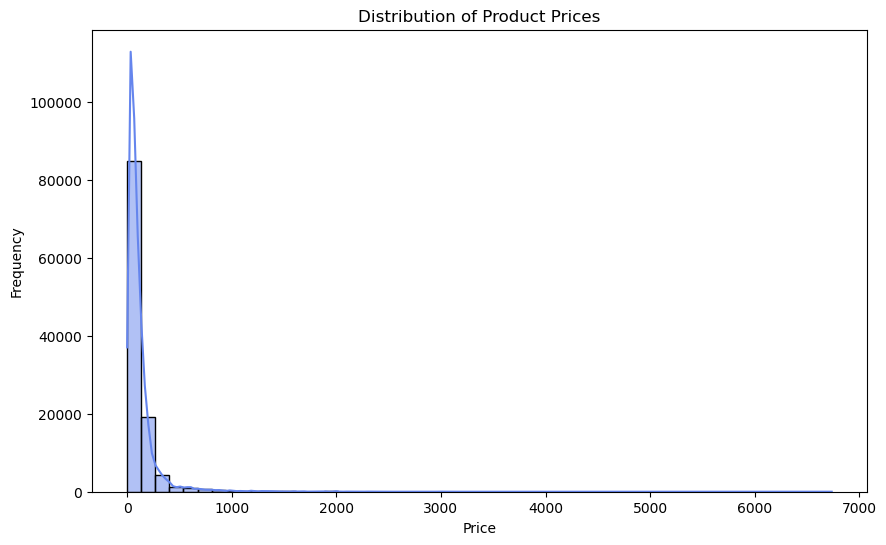

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化价格分布
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=50, kde=True, color='#6585ed')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig("1.png", dpi = 300)
plt.show()


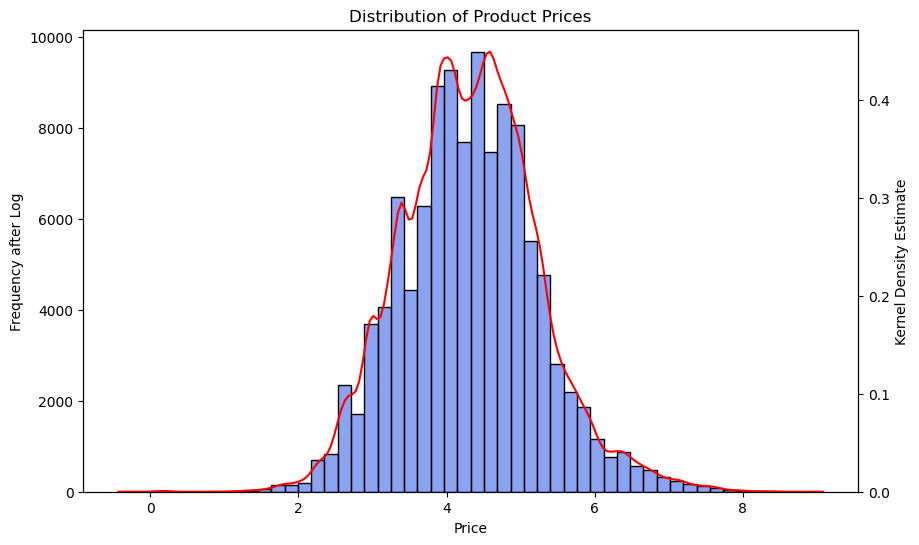

In [4]:
plt.figure(figsize=(10, 6))

# 绘制直方图
ax1 = plt.gca()
sns.histplot(np.log(df1['price']), bins=50, color='#6585ed', ax=ax1)
plt.xlabel('Price')
plt.ylabel('Frequency after Log')
# plt.semilogy()

# 添加双坐标轴
ax2 = ax1.twinx()

# 绘制核密度估计
sns.kdeplot(np.log(df1['price']), color='red', ax=ax2)
plt.ylabel('Kernel Density Estimate')

plt.title('Distribution of Product Prices')
plt.savefig("2.png", dpi = 300)
plt.show()

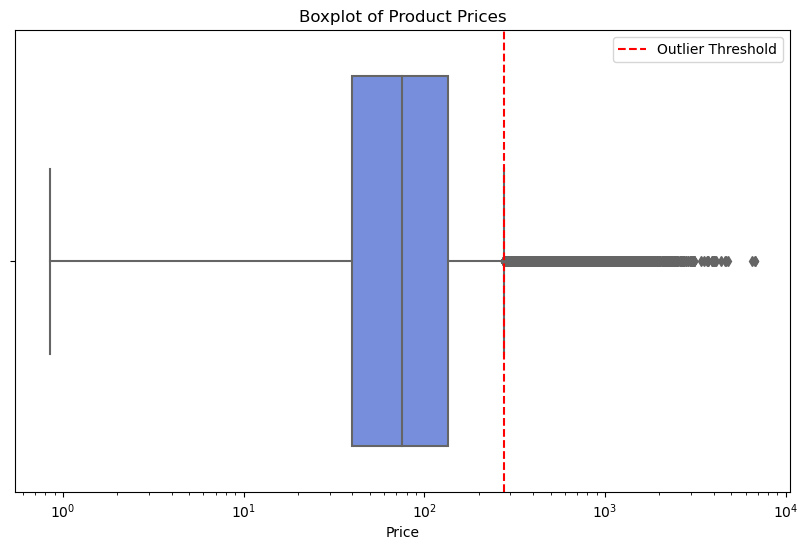

In [7]:
# 获取价格的统计摘要信息
price_stats = df1['price'].describe()

# 画价格的箱线图，并添加统计量
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['price'], color='#6585ed')
plt.axvline(x=price_stats['75%'] + 1.5 * (price_stats['75%'] - price_stats['25%']), color='red', linestyle='--', label='Outlier Threshold')
plt.legend()
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.semilogx()


# # 添加中位数、上下四分位数
# plt.text(20000, 0, f"25% Quartile: {price_stats['25%']}", fontsize=10, color='black')
# plt.text(20000, 0.05, f"Median: {price_stats['50%']}", fontsize=10, color='black')
# plt.text(20000, 0.1, f"75% Quartile: {price_stats['75%']}", fontsize=10, color='black')
# plt.text(20000, 0.15, f"Outlier Threshold: {price_stats['75%'] + 1.5 * (price_stats['75%'] - price_stats['25%'])}", fontsize=10, color='black')
plt.savefig("3.png", dpi = 300)
plt.show()

In [6]:
df2 = pd.read_csv('./olist_products_dataset.csv')
df2.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
df2.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
df2.shape

(32951, 9)

In [9]:
df2 = df2.dropna()
df2

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
name = pd.read_csv('./product_category_name_translation.csv')

In [11]:
df2 = pd.merge(df2, name,  on= 'product_category_name', how= 'left')
df2.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [12]:
df2.isnull().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

In [13]:
name.shape

(71, 2)

In [14]:
len(df2['product_category_name'].unique())

73

In [15]:
null_rows = df2[df2.isnull().any(axis=1)]

# 显示包含空值的行
print("Rows with null values:")
print(null_rows['product_category_name'])

## kitchen stand and food prep
## computer gamer

Rows with null values:
1581                                          pc_gamer
5703     portateis_cozinha_e_preparadores_de_alimentos
7176     portateis_cozinha_e_preparadores_de_alimentos
7326                                          pc_gamer
8647     portateis_cozinha_e_preparadores_de_alimentos
10822    portateis_cozinha_e_preparadores_de_alimentos
13995    portateis_cozinha_e_preparadores_de_alimentos
15874    portateis_cozinha_e_preparadores_de_alimentos
16608                                         pc_gamer
17459    portateis_cozinha_e_preparadores_de_alimentos
18251    portateis_cozinha_e_preparadores_de_alimentos
26397    portateis_cozinha_e_preparadores_de_alimentos
29369    portateis_cozinha_e_preparadores_de_alimentos
Name: product_category_name, dtype: object


In [16]:
df2.loc[df2['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'computer gamer'
df2.loc[df2['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen stand and food prep'
df2['product_category_name_english'] = df2['product_category_name_english'].str.replace('_', ' ')

In [17]:
df2.iloc[254]

product_id                       a18a23a783fb7576a8f0f6fbc2ae2b58
product_category_name                                beleza_saude
product_name_lenght                                          59.0
product_description_lenght                                  822.0
product_photos_qty                                            1.0
product_weight_g                                            175.0
product_length_cm                                            18.0
product_height_cm                                            22.0
product_width_cm                                             16.0
product_category_name_english                       health beauty
Name: 254, dtype: object

In [18]:
merge12 = pd.merge(df1, df2, on='product_id', how='inner')
merge12.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff


In [19]:
df2.shape

(32340, 10)

In [20]:
df1.shape

(112650, 7)

In [21]:
merge12.shape

(111046, 16)

In [22]:
merge12.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

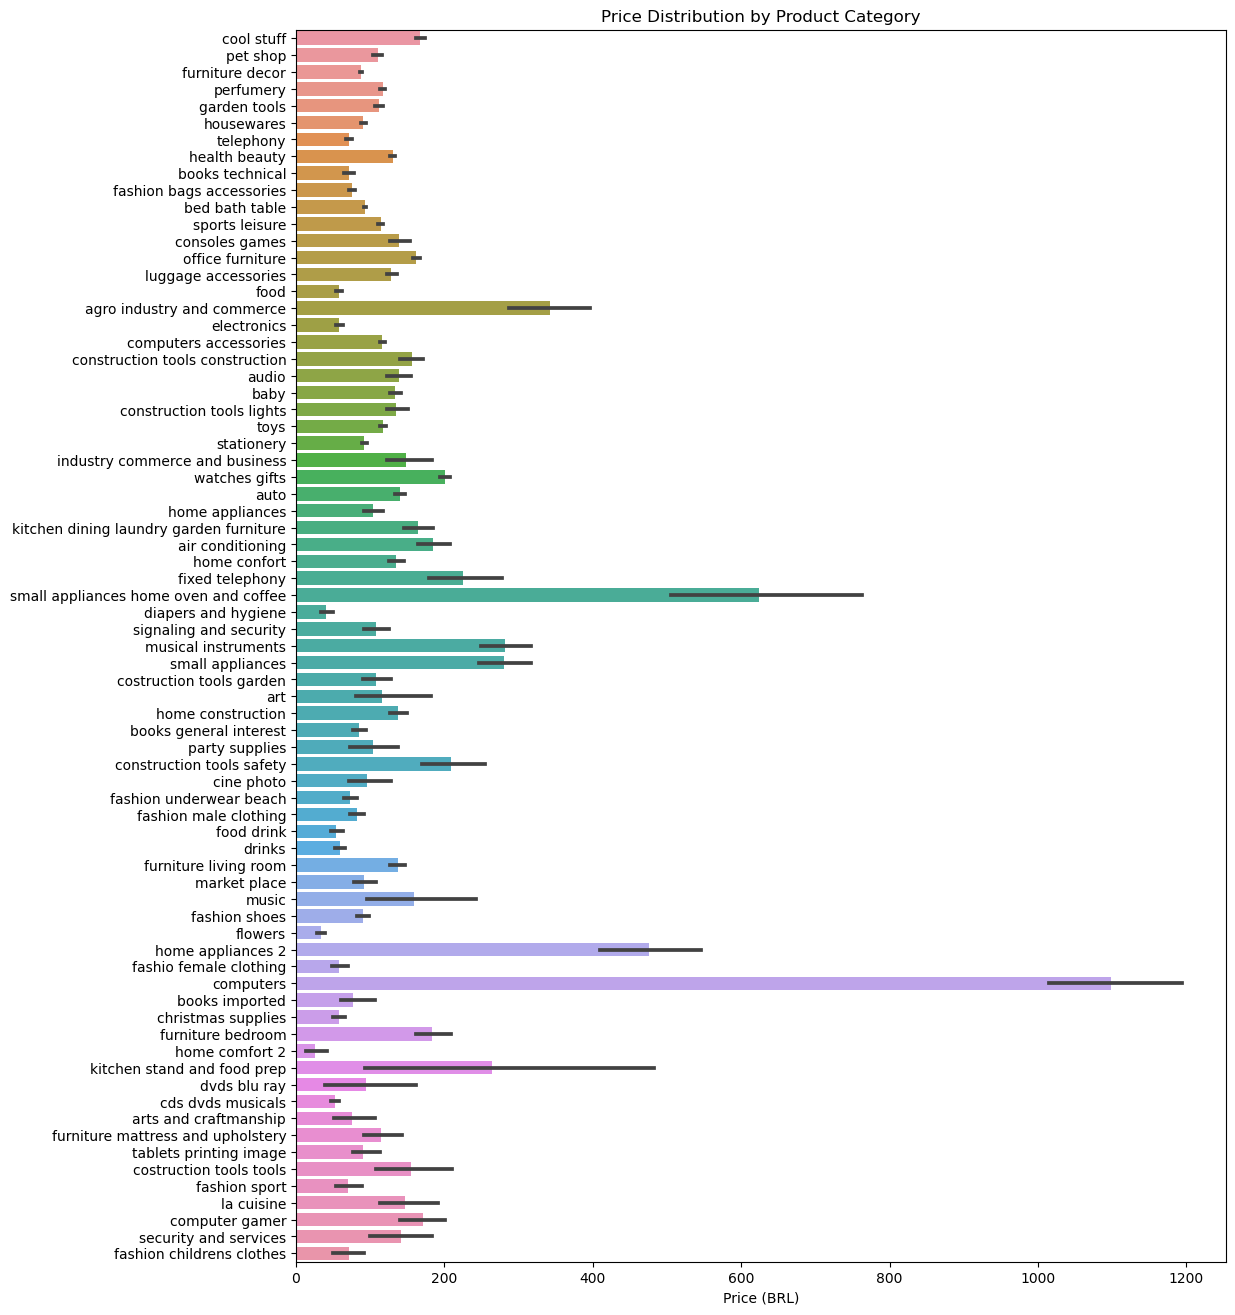

In [23]:
# 不同产品类别的价格比较
plt.figure(figsize=(12, 16))
sns.barplot(y='product_category_name_english', x='price', data=merge12)
plt.title('Price Distribution by Product Category')
plt.ylabel('')
plt.xlabel('Price (BRL)')
# plt.xticks(rotation=90)
plt.show()
# plt.savefig("4.png", dpi = 300)

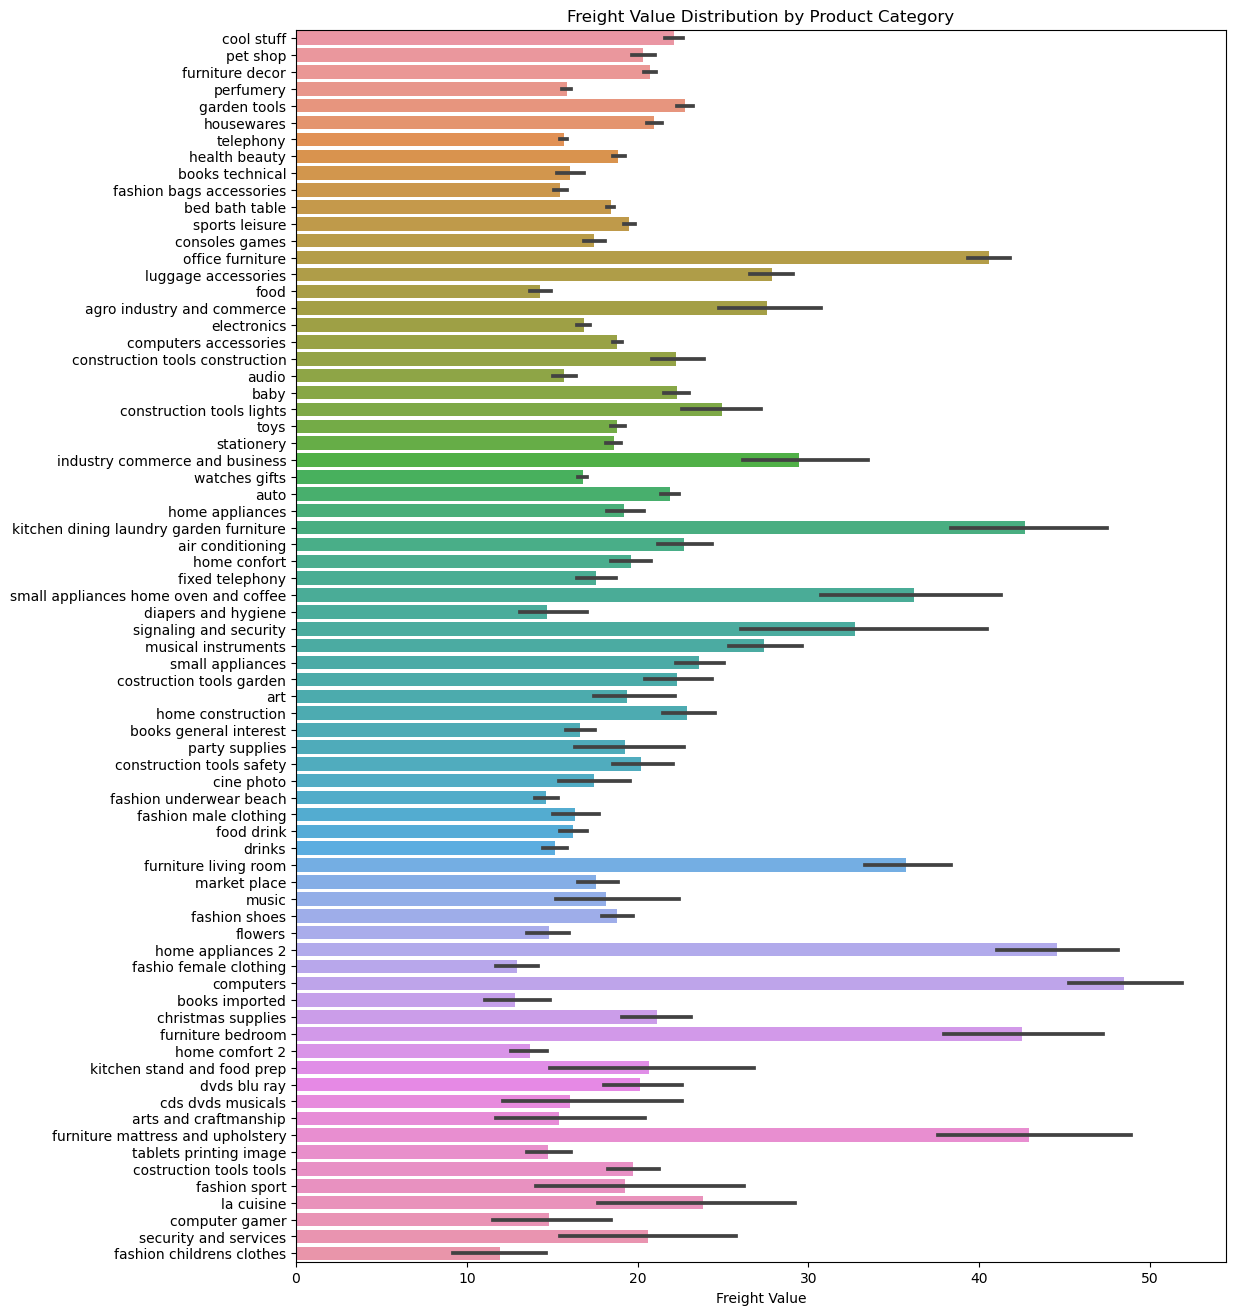

In [24]:
# 不同产品类别的运费比较
plt.figure(figsize=(12, 16))
sns.barplot(y='product_category_name_english', x='freight_value', data=merge12)
plt.title('Freight Value Distribution by Product Category')
plt.ylabel('')
plt.xlabel('Freight Value')
# plt.xticks(rotation=90)
plt.show()


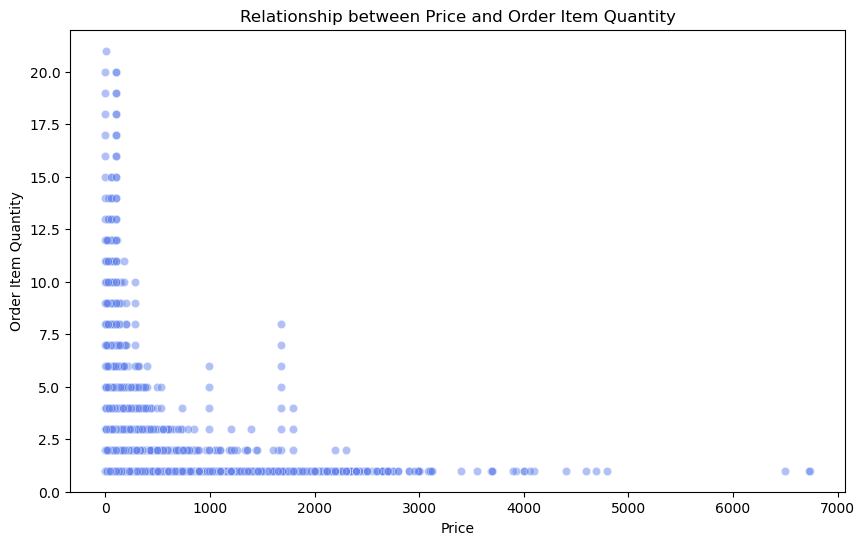

In [35]:
# 价格与销量的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='order_item_id', data=merge12, alpha = 0.5, color='#6585ed')
plt.title('Relationship between Price and Order Item Quantity')
plt.xlabel('Price')
plt.ylabel('Order Item Quantity')
# plt.semilogx()
plt.savefig("4.png", dpi = 300)
plt.show()

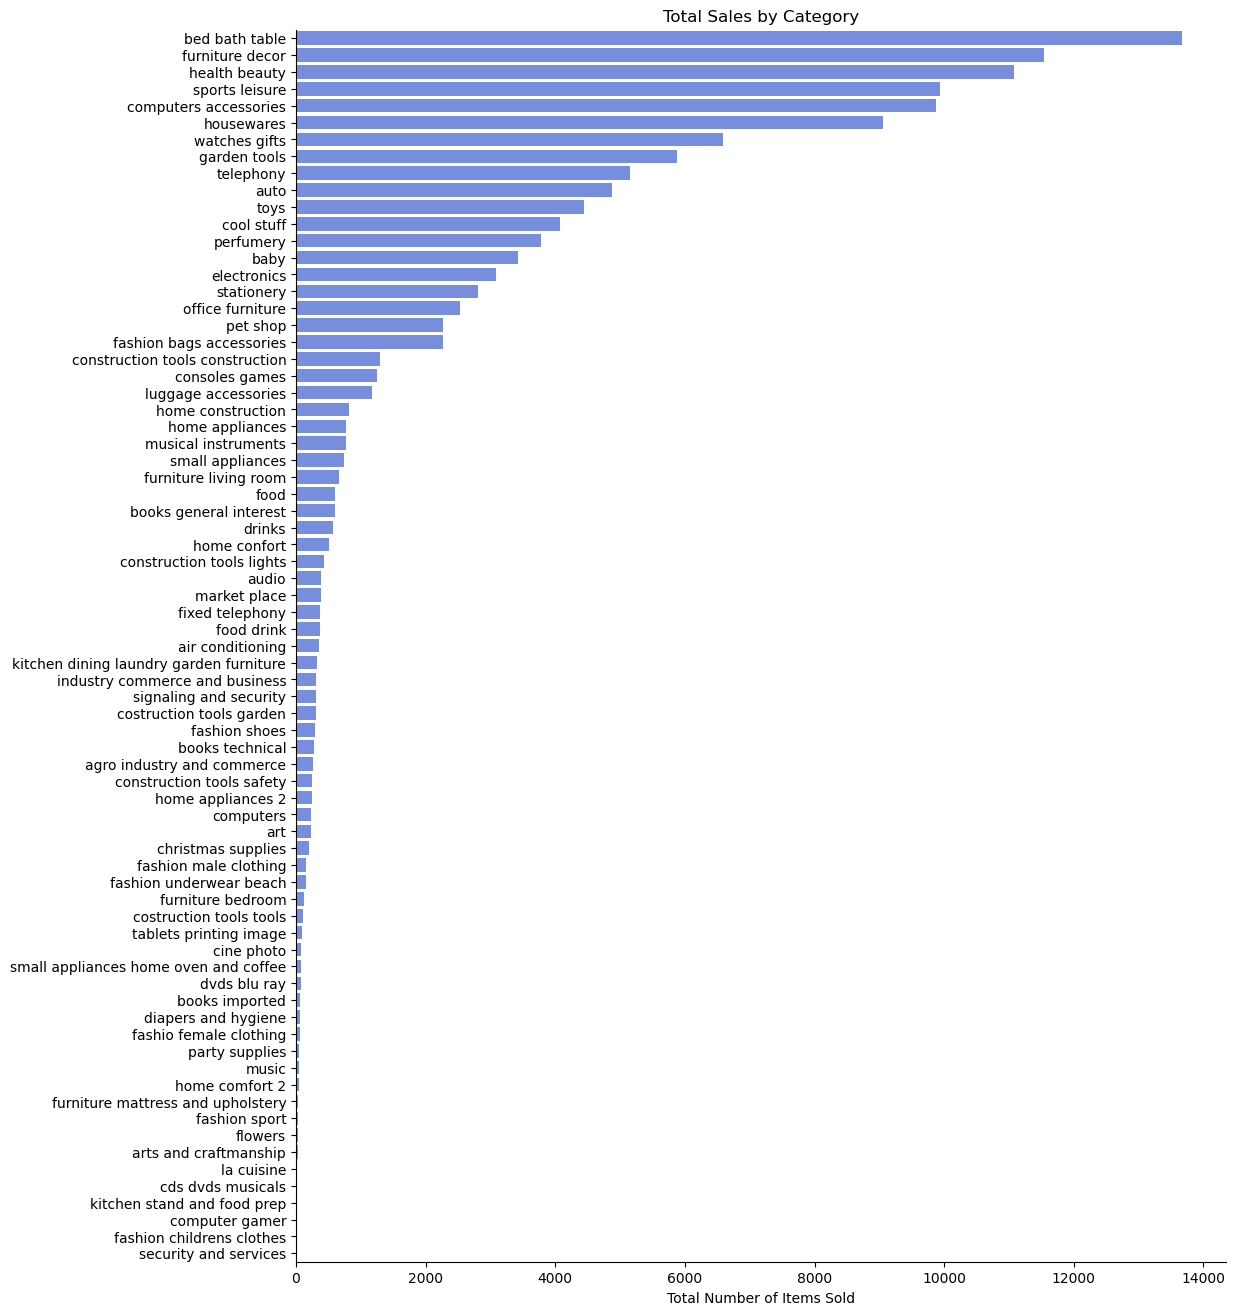

In [64]:
# 按产品类别汇总销量
category_sales = merge12.groupby('product_category_name_english')['order_item_id'].sum().reset_index()



# 刻画类别与销量的关系
plt.figure(figsize=(12, 16))
sns.barplot(y='product_category_name_english', x='order_item_id', data=category_sales, order=category_sales.sort_values('order_item_id', ascending=False)['product_category_name_english'], color="#6585ed")
plt.title('Total Sales by Category')
plt.ylabel('')
# plt.xticks(rotation=90)
plt.xlabel('Total Number of Items Sold')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)
# plt.semilogx()
plt.savefig('./8.png', dpi = 300)
plt.show()

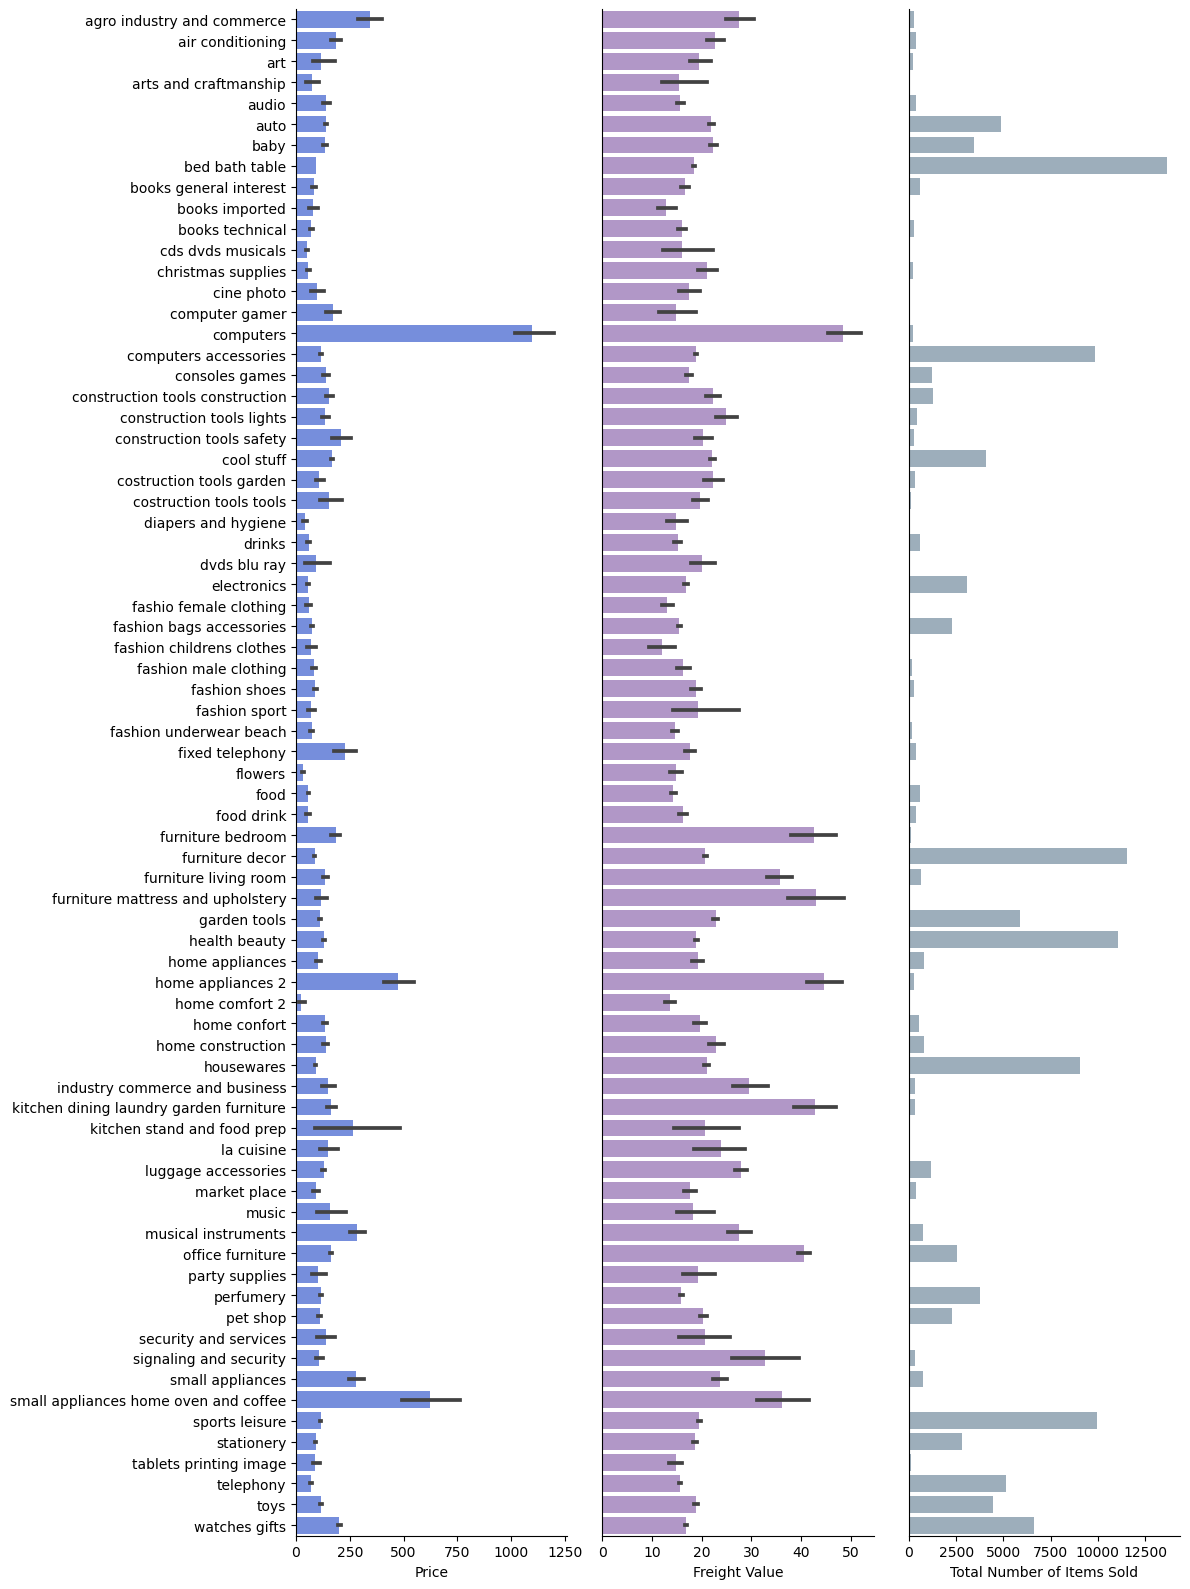

In [66]:
merge12_sorted = merge12.sort_values(by='product_category_name_english')

# 创建一个包含两个子图的 figure
plt.figure(figsize=(12, 16))

palette_color = ["#6585ed","#f4979c","#B18FCF","#98afc0"]

# 第一个子图：不同产品类别的运费比较
plt.subplot(1, 3, 2)
sns.barplot(y='product_category_name_english', x='freight_value', data=merge12_sorted, color=palette_color[2])
# plt.title('Freight Value Distribution by Product Category')
plt.xlabel('Freight Value')
plt.ylabel('')
plt.yticks([])
# plt.xticks(rotation=90)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# 第二个子图：不同产品类别的价格比较
plt.subplot(1, 3, 1)
sns.barplot(y='product_category_name_english', x='price', data=merge12_sorted, color=palette_color[0])
# plt.title('Price Distribution by Product Category')
plt.xlabel('Price')
plt.ylabel('')
# plt.yticks([])
# plt.xticks(rotation=90)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.subplot(1, 3, 3)
sns.barplot(y='product_category_name_english', x='order_item_id', data=merge12.groupby('product_category_name_english')['order_item_id'].sum().reset_index(), color=palette_color[3])
# plt.title('Relationship between Price and Total Sales by Category')
plt.ylabel('')
plt.yticks([])
# plt.xticks(rotation=90)
plt.xlabel('Total Number of Items Sold')
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig("6.png", dpi = 300)
# 显示图形
plt.show()

In [30]:
# 获取产品类别列表
categories = category_sales_prices.sort_values('order_item_id', ascending=False)['product_category_name_english'].unique()

# 创建子图
fig, axes = plt.subplots(nrows=9, ncols=8, figsize=(20, 20))

# 遍历每个产品类别，绘制价格与销量的关系图
for i, ax in enumerate(axes.flatten()):
    if i < len(categories):
        category = categories[i]
        # 提取当前类别的数据
        category_data = merge12[merge12['product_category_name_english'] == category]

        # 刻画当前类别的价格与销量的关系
        sns.scatterplot(x='price', y='order_item_id', data=category_data, ax=ax, alpha = 0.3)
        ax.set_title(f'{category}')
#         ax.set_xlabel('Price (BRL)')
#         ax.set_ylabel('Total Number of Items Sold')
#         ax.legend([category], loc='upper right')

# 调整布局
plt.tight_layout()
plt.savefig("7.png", dpi = 300)
plt.show()

NameError: name 'category_sales_prices' is not defined

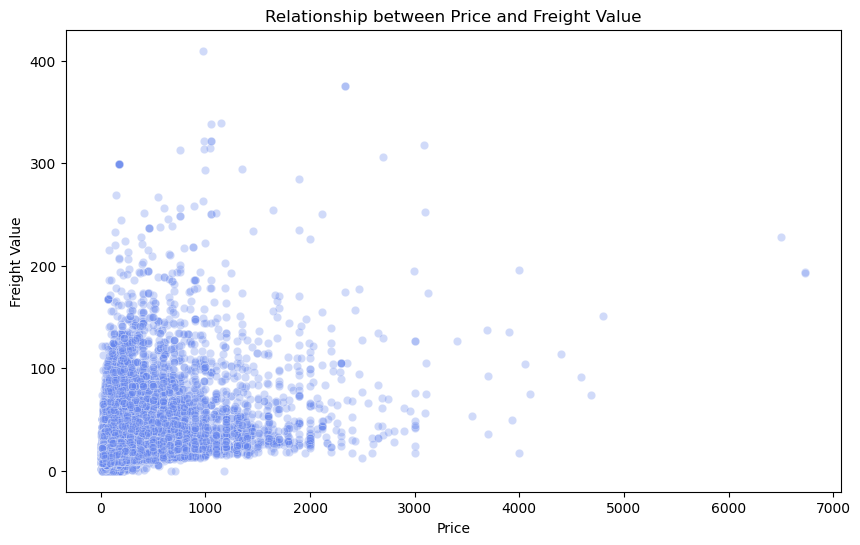

In [204]:
# 价格与运费的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=merge12, color='#6585ed', alpha = 0.3)
plt.title('Relationship between Price and Freight Value')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()